# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [0]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [10]:
pima_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv")
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [11]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [12]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [17]:
pima_df.sample(n=10)
print(pima_df.dtypes)
#print(pima_df.shape)

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [16]:
print(pima_df.shape)

(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q5 Print the descriptive statistics of each & every column using describe() function

In [44]:
pima_df.describe()
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [0]:
pima_df.replace(to_replace={'Plas':0,'Pres':0,'skin':0,'test':0,'mass':0},value={'Plas':pima_df.Plas.median(),'Pres':pima_df.Pres.median(),'skin':pima_df.skin.median(),'test':pima_df.test.median(),'mass':pima_df.mass.median()},inplace=True)

In [34]:

pima_df.sample(n=10)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
673,3,123,100,35,240.0,57.3,0.880,22,0
549,4,189,110,31,30.5,28.5,0.680,37,0
484,0,145,72,23,30.5,44.2,0.630,31,1
430,2,99,72,23,30.5,22.2,0.108,23,0
591,2,112,78,50,140.0,39.4,0.175,24,0
250,9,106,52,23,30.5,31.2,0.380,42,0
238,9,164,84,21,30.5,30.8,0.831,32,1
416,1,97,68,21,30.5,27.2,1.095,22,0
316,3,99,80,11,64.0,19.3,0.284,30,0
703,2,129,72,23,30.5,38.5,0.304,41,0


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

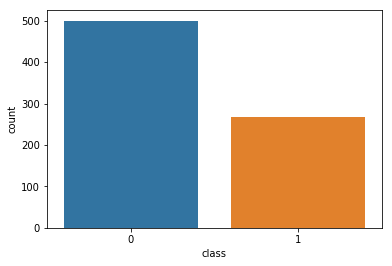

In [45]:
sns.countplot(x='class', data=pima_df) 

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

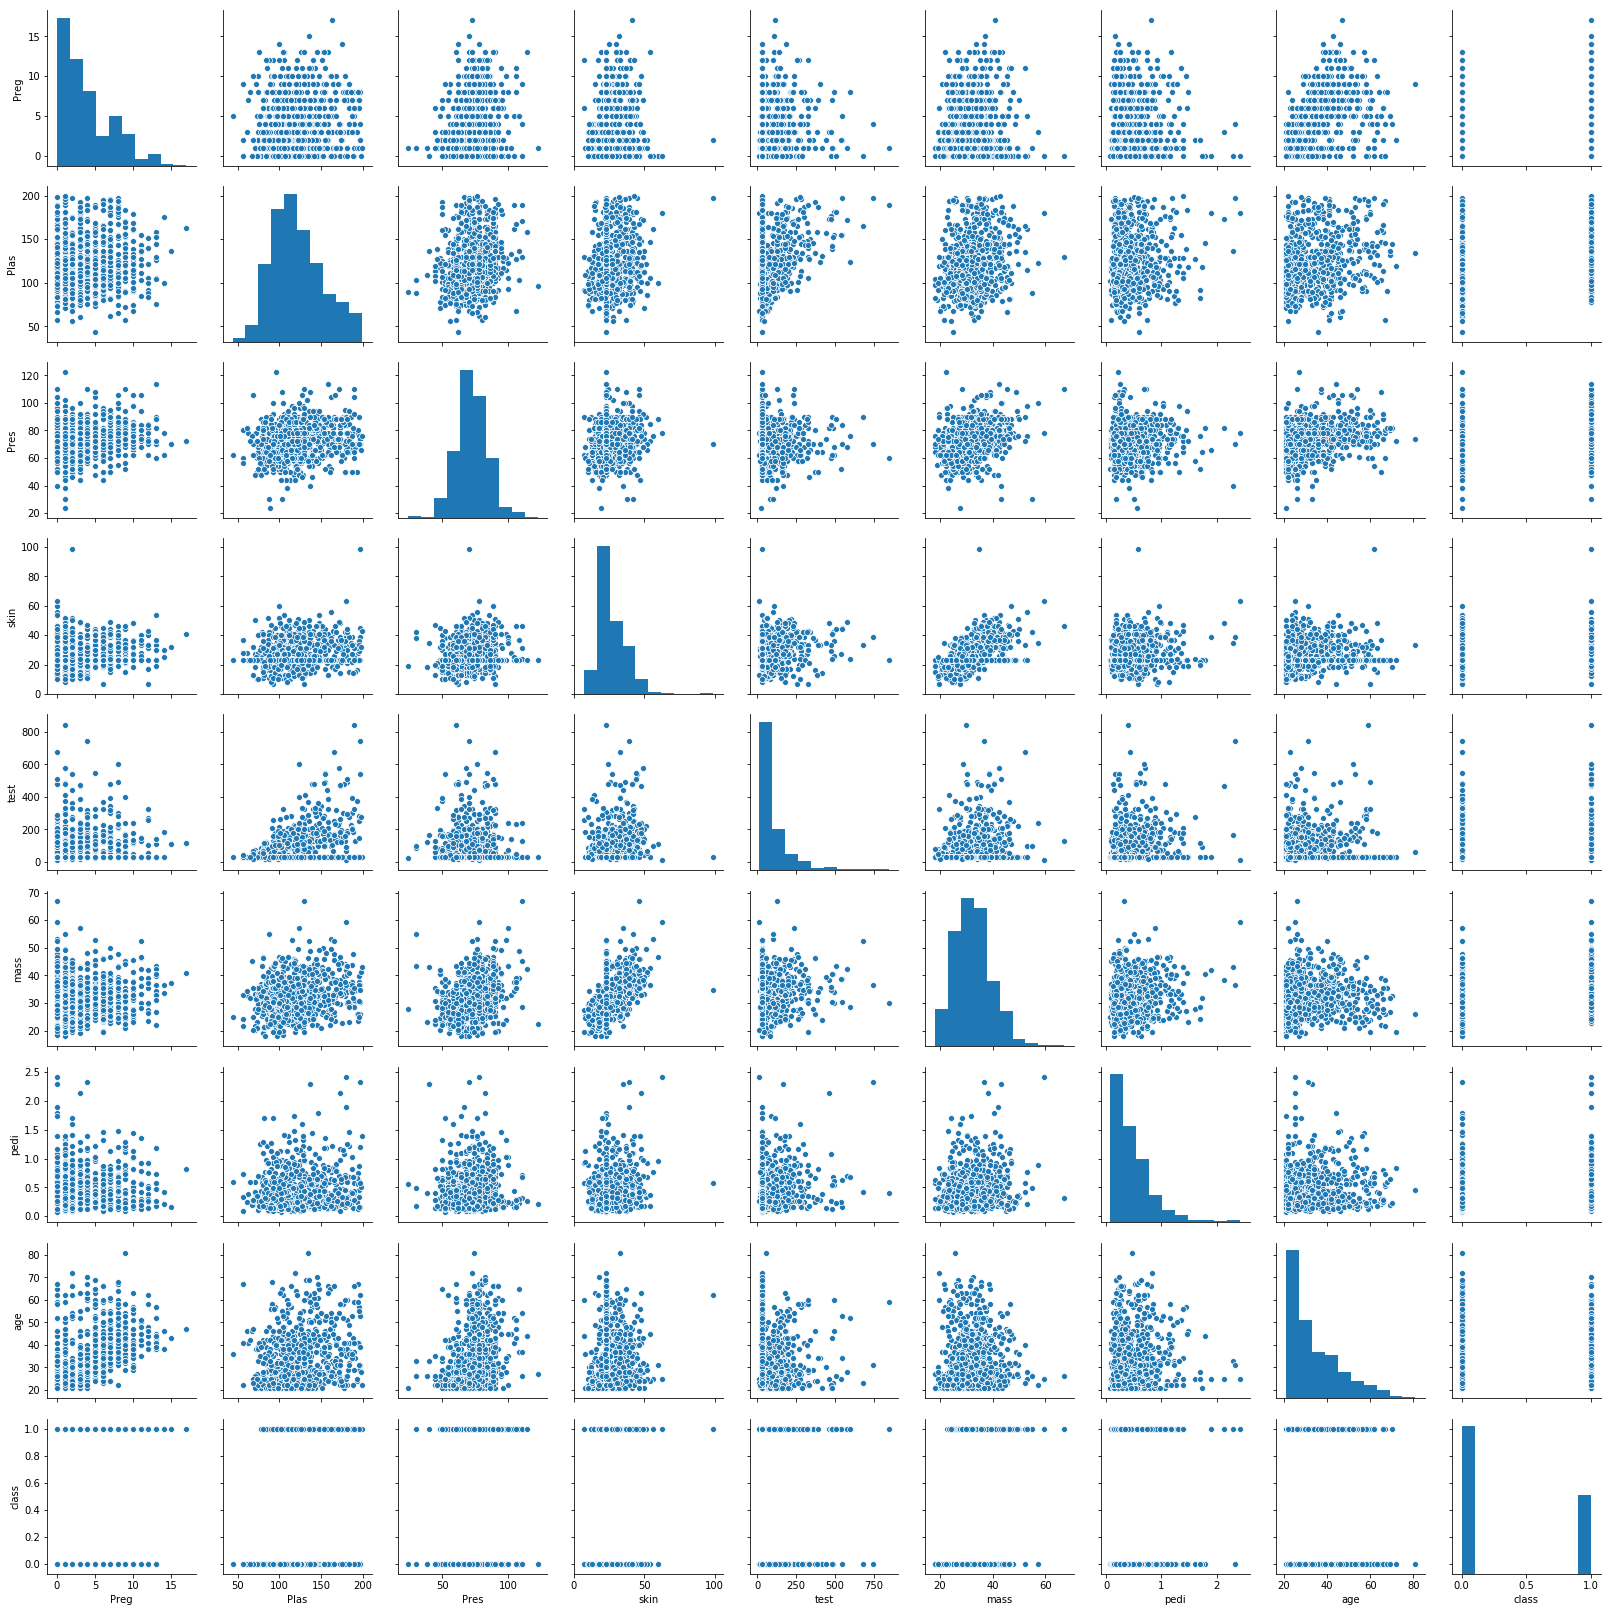

In [46]:
pima_df_attr = pima_df.iloc[:,0:9]
sns.pairplot(pima_df_attr)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from IPython.display import Image 

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [50]:
x=pima_df.iloc[:,:8]
y=pima_df.iloc[:,8]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0) 
xtrain.shape,xtest.shape 

((537, 8), (231, 8))

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [53]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(xtrain,ytrain)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [58]:
print(metrics.accuracy_score(dt_model.predict(xtest),ytest))
metrics.confusion_matrix(dt_model.predict(xtest),ytest)

0.7489177489177489


array([[126,  27],
       [ 31,  47]])

Print the feature importance of the decision model - Optional